# SC1015 Data Science & Artificial Intelligence Mini Project📊
## Stroke Prediction
Members: Tan Jin Yong (U2322914J) & Ryan Ching Kay Joon (U2321286F)

## 📌Problem Statement📌:
### Are we able to identify the contributing factors that causes a stroke to happen?

### Data Importing, Cleaning, and Preparation

Import the relevant libraries that we need for this project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import graphviz
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

sb.set()
pd.set_option('display.max_rows', None)

Import the csv file into DataFrame

In [2]:
datacsv = pd.read_csv('healthcare-dataset-stroke-data.csv')
print("Shape of data is: " + str(datacsv.shape))
print('\n')

#View the information of the DataFrame
print(datacsv.info())
print("\n")

#View the top few rows of the DataFrame to ensure it's imported correctly
datacsv.head()

Shape of data is: (5110, 12)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None




id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

**Observations:**

We have 5110 rows of data entries, with 12 columns of different variables for each row. We can proceed to clean and prepare the dataset by removing some of the details that we do not need for our analysis. From the .info(), we observe the BMI column has some NULL entries. We will drop these rows as setting the BMI to 0 will affect the overall outcome of our analysis on BMI.

We also discovered that some of the entries have age = 0 or have decimal points. We will convert it to int data type and drop those rows with age set to 0 as it might affect our overall prediction if we were to use it.

We will also convert and map smoking_status to numerical values for easier plotting out in the graph later.

In [3]:
#Drop the unnecessary column and row

#The ID row is of no use for us
cleancsv = datacsv.drop(['id'], axis=1)

#We notice some of the BMI values are NaN. It would not make sense for us to replace it with 0 as
#it will affect the overall dataset. Hence it would be better to remove the whole row
cleancsv = cleancsv.drop(cleancsv[cleancsv['bmi'].isna()].index)

#We shall convert the age from float to int, as we notice there are weird values of e.g. 1.08. After conversion to int64, we remove those with age 0
cleancsv['age'] = cleancsv['age'].astype('int64')
cleancsv = cleancsv[cleancsv['age'] != 0]

#We convert the status of smoking into numerical values
#Mapping
smoking_mapping = {'never smoked': 1, 'smokes': 2, 'formerly smoked': 3, 'Unknown': 0}
#Apply mapping
cleancsv['smoking_status_numerical'] = cleancsv['smoking_status'].map(smoking_mapping)

#Output into actual file for debugging and verifying
#cleancsv.to_csv('output.csv', index=False)

#View cleancsv
cleancsv

gender  age  hypertension  heart_disease ever_married      work_type  \
0       Male   67             0              1          Yes        Private   
2       Male   80             0              1          Yes        Private   
3     Female   49             0              0          Yes        Private   
4     Female   79             1              0          Yes  Self-employed   
5       Male   81             0              0          Yes        Private   
6       Male   74             1              1          Yes        Private   
7     Female   69             0              0           No        Private   
9     Female   78             0              0          Yes        Private   
10    Female   81             1              0          Yes        Private   
11    Female   61             0              1          Yes       Govt_job   
12    Female   54             0              0          Yes        Private   
14    Female   79             0              1          Yes        Private   
15    Female   50             1              0          Yes  Self-employed   
16      Male   64             0              1          Yes        Private   
17      Male   75             1              0          Yes        Private   
18    Female   60             0              0           No        Private   
20    Female   71             0              0          Yes       Govt_job   
21    Female   52             1              0          Yes  Self-employed   
22    Female   79             0              0          Yes  Self-employed   
23      Male   82             0              1          Yes        Private   
24      Male   71             0              0          Yes        Private   
25      Male   80             0              0          Yes  Self-employed   
26    Female   65             0              0          Yes        Private   
28      Male   69             0              1          Yes  Self-employed   
30      Male   57             1              0          Yes        Private   
31      Male   42             0              0          Yes        Private   
32    Female   82             1              0          Yes  Self-employed   
33      Male   80             0              1          Yes  Self-employed   
34      Male   48             0              0           No       Govt_job   
35    Female   82             1              1           No        Private   
36      Male   74             0              0          Yes        Private   
37    Female   72             1              0          Yes        Private   
38      Male   58             0              0           No        Private   
39    Female   49             0              0          Yes        Private   
40      Male   78             0              0          Yes        Private   
41      Male   54             0              0          Yes        Private   
42      Male   82             0              1          Yes        Private   
44      Male   60             1              0          Yes       Govt_job   
45      Male   76             1              0          Yes        Private   
47    Female   58             0              0          Yes        Private   
48      Male   81             0              0          Yes  Self-employed   
49    Female   39             1              0          Yes        Private   
52    Female   79             0              1          Yes        Private   
53    Female   77             1              0          Yes  Self-employed   
55      Male   63             0              1          Yes        Private   
56    Female   82             0              0          Yes        Private   
58      Male   73             1              0          Yes  Self-employed   
59    Female   54             1              0          Yes       Govt_job   
60    Female   56             0              0          Yes        Private   
61    Female   80             1              0          Yes        Private   
62    Female   67           

In [4]:
print("Shape of data is: " + str(cleancsv.shape))
print('\n')
print(cleancsv.info())

Shape of data is: (4867, 12)


<class 'pandas.core.frame.DataFrame'>
Index: 4867 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    4867 non-null   object 
 1   age                       4867 non-null   int64  
 2   hypertension              4867 non-null   int64  
 3   heart_disease             4867 non-null   int64  
 4   ever_married              4867 non-null   object 
 5   work_type                 4867 non-null   object 
 6   Residence_type            4867 non-null   object 
 7   avg_glucose_level         4867 non-null   float64
 8   bmi                       4867 non-null   float64
 9   smoking_status            4867 non-null   object 
 10  stroke                    4867 non-null   int64  
 11  smoking_status_numerical  4867 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 494.3+ KB
None


After removing those rows with the BMI as NaN, we now have 4867 rows of entries

## Exploratory Data Analysis (EDA)🔎
We proceed with doing EDA on the dataset we have to understand it better

In [5]:
cleancsv.describe()

age  hypertension  heart_disease  avg_glucose_level  \
count  4867.000000   4867.000000    4867.000000        4867.000000   
mean     43.223957      0.092665       0.049928         105.388847   
std      22.317847      0.289992       0.217819          44.534097   
min       1.000000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.080000   
50%      45.000000      0.000000       0.000000          91.680000   
75%      60.500000      0.000000       0.000000         113.600000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  smoking_status_numerical  
count  4867.000000  4867.000000               4867.000000  
mean     28.985720     0.042942                  1.199301  
std       7.817091     0.202748                  1.046855  
min      10.300000     0.000000                  0.000000  
25%      23.700000     0.000000                  0.000000  
50%      28.100000     0.000000                  1.000000  
75%      33.100000     0.000000                  2.000000  
max      97.600000     1.000000                  3.000000

We observe the min, max, Q1, Q3, median, and STD for the range of numerical values that was collected, mainly age, avg_gluclose_level, and bmi. The rest are categorical values so their describe() aren't important

#### We will Boxplot the numerical values of age, avg_gluclose_level, and bmi to view the spread of data

Q1 value of age is: 25.0
Q3 value of age is: 60.5

Q1 value of avg_glucose_level is: 77.08
Q3 value of avg_glucose_level is: 113.6
Upper Bound of bmavg_glucose_leveli is: 168.38

Q1 value of bmi is: 23.7
Q3 value of bmi is: 33.1
Upper Bound of bmi is: 47.2



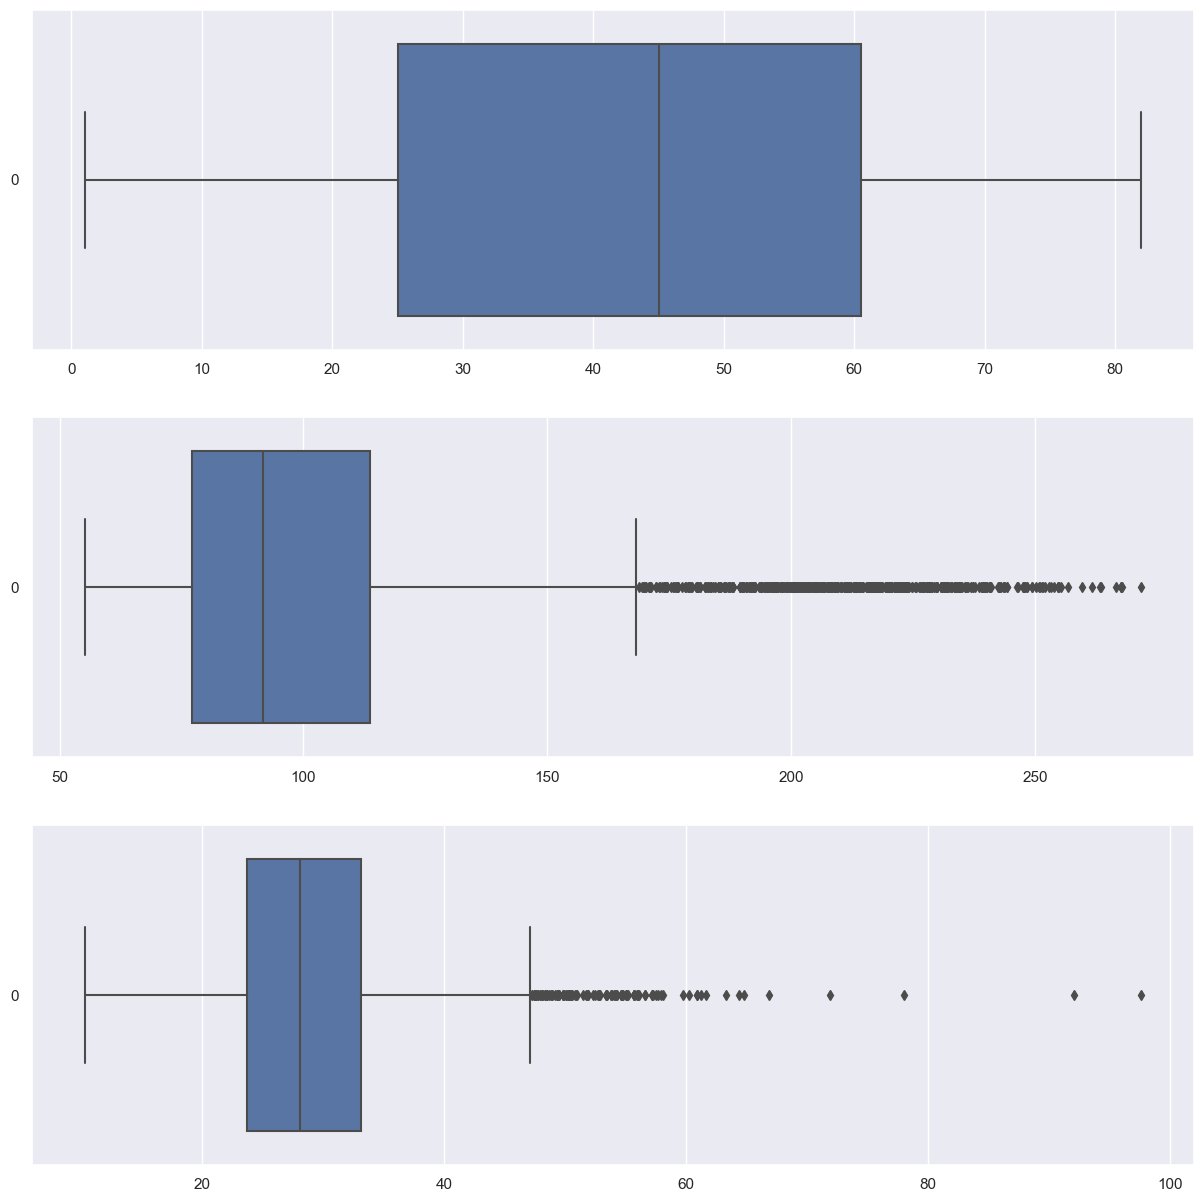

In [6]:
#Setting the plots
f, axes = plt.subplots(3, 1, figsize=(15, 15))
sb.boxplot(cleancsv['age'], orient = 'h', ax = axes[0])
sb.boxplot(cleancsv['avg_glucose_level'], orient = 'h', ax = axes[1])
sb.boxplot(cleancsv['bmi'], orient = 'h', ax = axes[2])

#Extracting the values from the respective variables
BMIQ1 = cleancsv['bmi'].quantile(0.25)
BMIQ3 = cleancsv['bmi'].quantile(0.75)
IQR_bmi = BMIQ3 - BMIQ1
UB_bmi = BMIQ3 + (IQR_bmi*1.5)

AGLQ1 = cleancsv['avg_glucose_level'].quantile(0.25)
AGLQ3 = cleancsv['avg_glucose_level'].quantile(0.75)
IQR_agl = AGLQ3 - AGLQ1
UB_agl = AGLQ3 + (IQR_agl*1.5)

print('Q1 value of age is: ' + str(cleancsv['age'].quantile(0.25)))
print('Q3 value of age is: ' + str(cleancsv['age'].quantile(0.75)))
print()
print('Q1 value of avg_glucose_level is: ' + str(cleancsv['avg_glucose_level'].quantile(0.25)))
print('Q3 value of avg_glucose_level is: ' + str(cleancsv['avg_glucose_level'].quantile(0.75)))
print('Upper Bound of bmavg_glucose_leveli is: ' + str(UB_agl))
print()
print('Q1 value of bmi is: ' + str(cleancsv['bmi'].quantile(0.25)))
print('Q3 value of bmi is: ' + str(cleancsv['bmi'].quantile(0.75)))
print('Upper Bound of bmi is: ' + str(UB_bmi))
print()

Analysis of the above Boxplots:

1. We have quite a diverse dataset for age group, with 50% of the data lying between 25 to 60 years old
2. While 50% of our dataset data hovers around the 77+ to 113 for avg_glucose_level, we observe that there is a significant amount of outliers in our dataset for the average gluclose level. This could be worth exploring more, perhaps hypertension and heart disease might have a contribution to it
3. Similar to the average gluclose level, we observe that there are quite a number of outliers whose value are above 47.2. This seems to lean towards the obese side if we compare it with the BMI chart...just an interesting note!

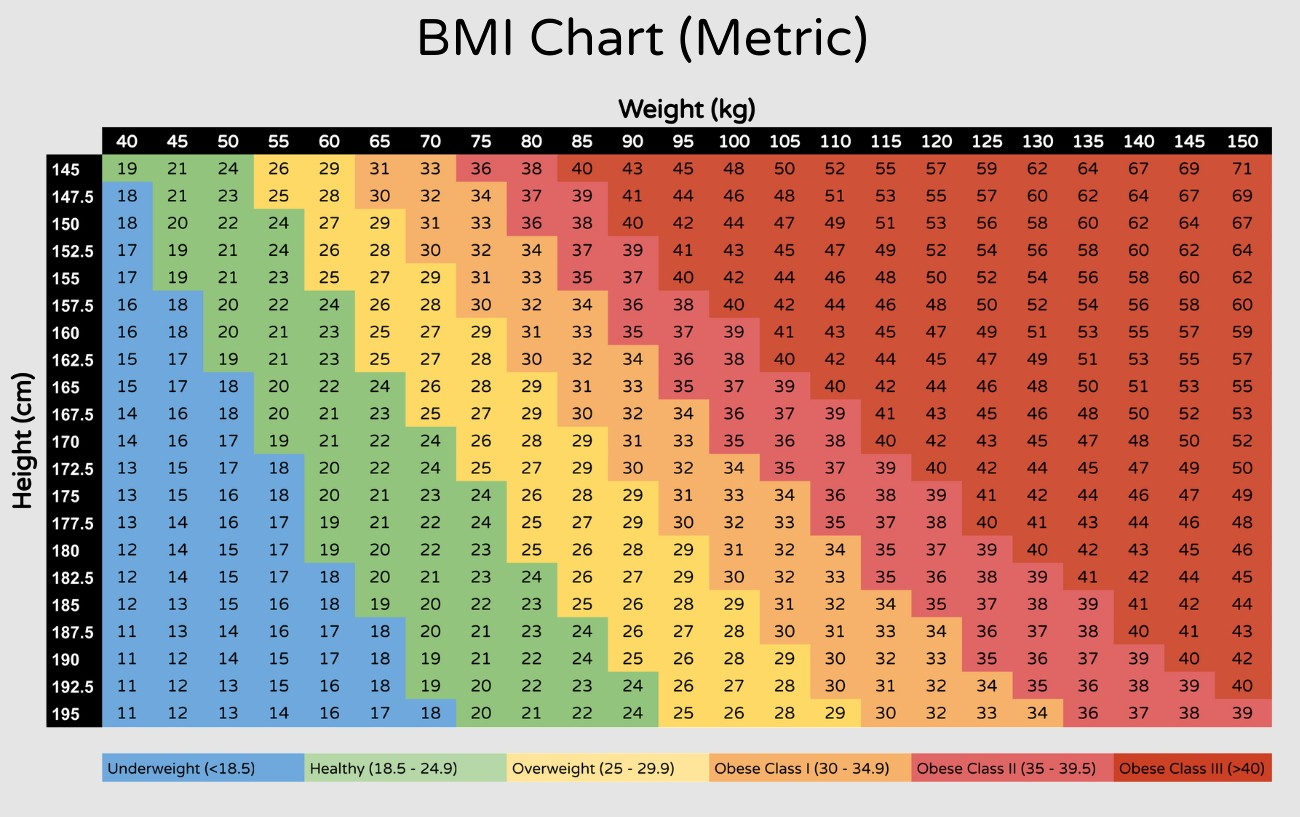

#### We will now explore the Categorical values, namely hypertension, heart_disease, stroke, gender, smoking status, and Residence type

Value count of hypertension is:

hypertension
0    4416
1     451
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


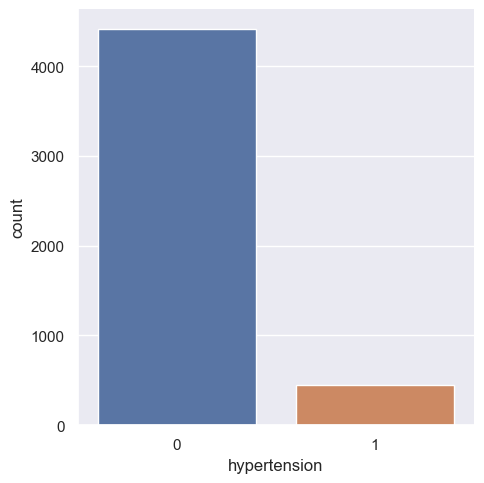

In [7]:
print('Value count of hypertension is:\n')
print(cleancsv['hypertension'].value_counts())
print()
sb.catplot(x="hypertension", data = cleancsv, kind = "count")

Value count of heart_disease is:

heart_disease
0    4624
1     243
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


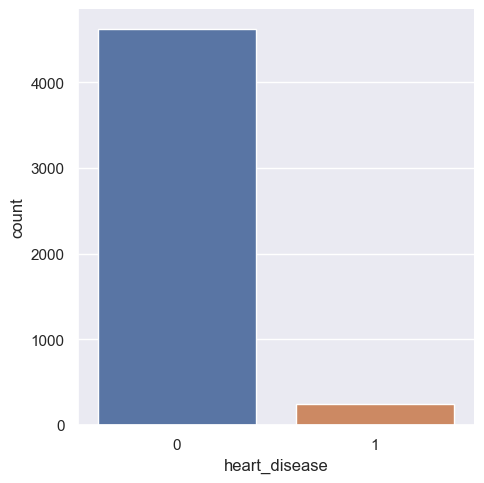

In [8]:
print('Value count of heart_disease is:\n')
print(cleancsv['heart_disease'].value_counts())
print()
sb.catplot(x="heart_disease", data = cleancsv, kind = "count")

Value count of stroke is:

stroke
0    4658
1     209
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


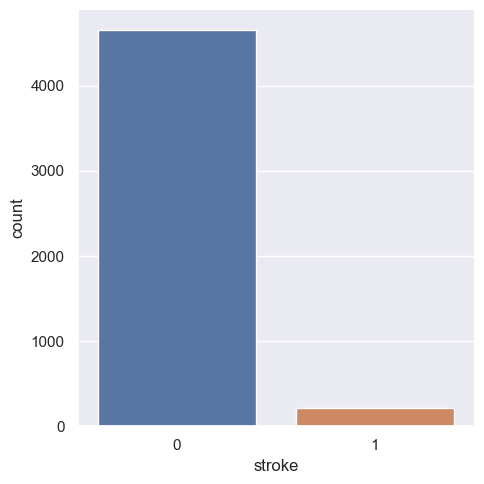

In [9]:
print('Value count of stroke is:\n')
print(cleancsv['stroke'].value_counts())
print()
sb.catplot(x="stroke", data = cleancsv, kind = "count")

Based on the observations in the catplot, it can be observed that most of the values leans towards negative (0) for the 3 variables. Therefore, we should take note that if we were to do a classification prediction, there might be a higher chance of getting False Negative, since our dataset trains the model more on achieving and predicting a negative outcome

Value count of gender is:

gender
Female    2882
Male      1984
Other        1
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


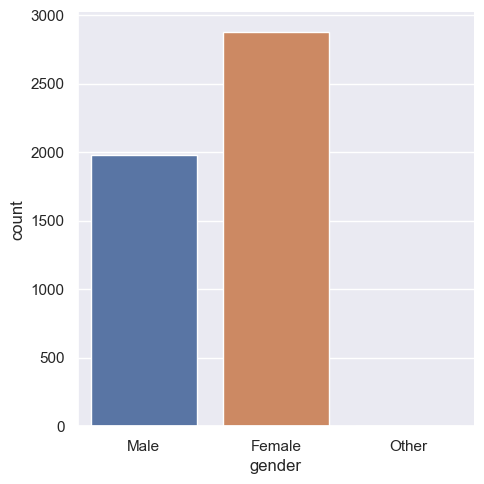

In [10]:
print('Value count of gender is:\n')
print(cleancsv['gender'].value_counts())
print()
sb.catplot(x="gender", data = cleancsv, kind = "count")

Our dataset has slightly more females then males, but this should not affect our overall prediction

Value count of smoking_status is:

smoking_status
never smoked       1852
Unknown            1441
formerly smoked     837
smokes              737
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


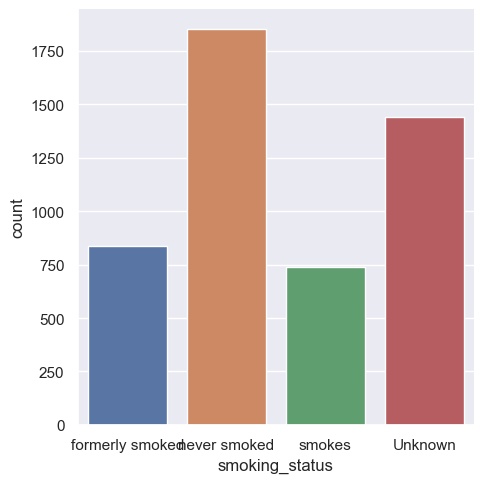

In [11]:
print('Value count of smoking_status is:\n')
print(cleancsv['smoking_status'].value_counts())
print()
sb.catplot(x="smoking_status", data = cleancsv, kind = "count")

Interestingly for the smoking status, we have quite a range, from former smokers, to current smokers, and people who never smoked before. There are also people who did not indicate their smoking status

Value count of Residence_type is:

Residence_type
Urban    2468
Rural    2399
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


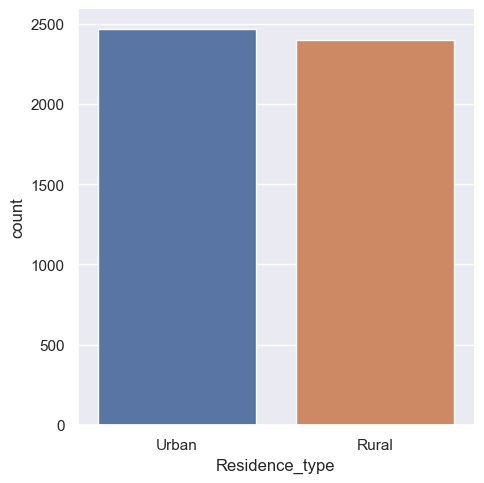

In [12]:
print('Value count of Residence_type is:\n')
print(cleancsv['Residence_type'].value_counts())
print()
sb.catplot(x="Residence_type", data = cleancsv, kind = "count")

Our dataset has quite a nice balance between people living in urban and rural areas. This can be an interesting factor to consider when we do our analysis and prediction

Value count of ever_married is:

ever_married
Yes    3204
No     1663
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


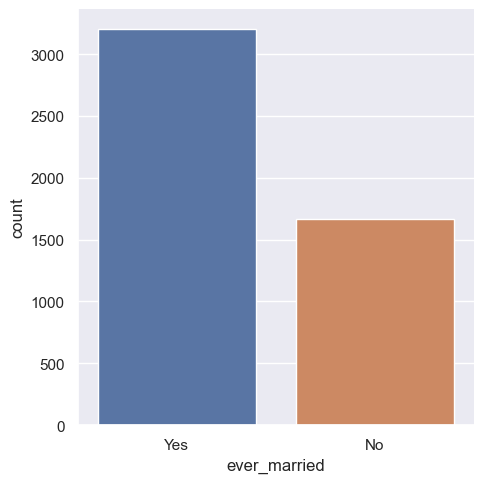

In [13]:
print('Value count of ever_married is:\n')
print(cleancsv['ever_married'].value_counts())
print()
sb.catplot(x="ever_married", data = cleancsv, kind = "count")

Value count of work_type is:

work_type
Private          2811
Self-employed     775
Govt_job          630
children          629
Never_worked       22
Name: count, dtype: int64



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


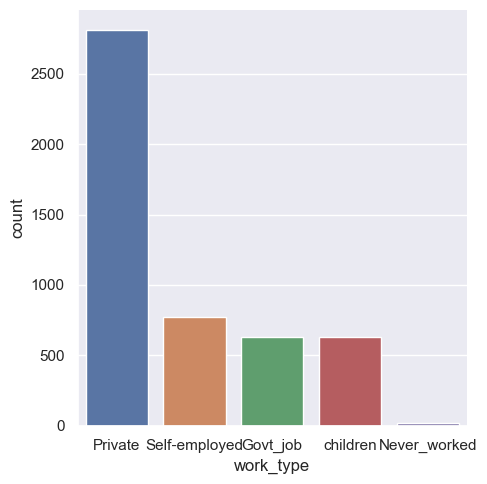

In [14]:
print('Value count of work_type is:\n')
print(cleancsv['work_type'].value_counts())
print()
sb.catplot(x="work_type", data = cleancsv, kind = "count")

For married status and work type, we think it might not play an important role in our classification, but good to have a view of how the data spreads out there

#### We proceed with plotting of other graphs to see the relations between the variables

In [15]:
targetds = pd.DataFrame(cleancsv[['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'stroke', 'bmi', 'smoking_status_numerical']])

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='age', ylabel='stroke'>

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 56.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


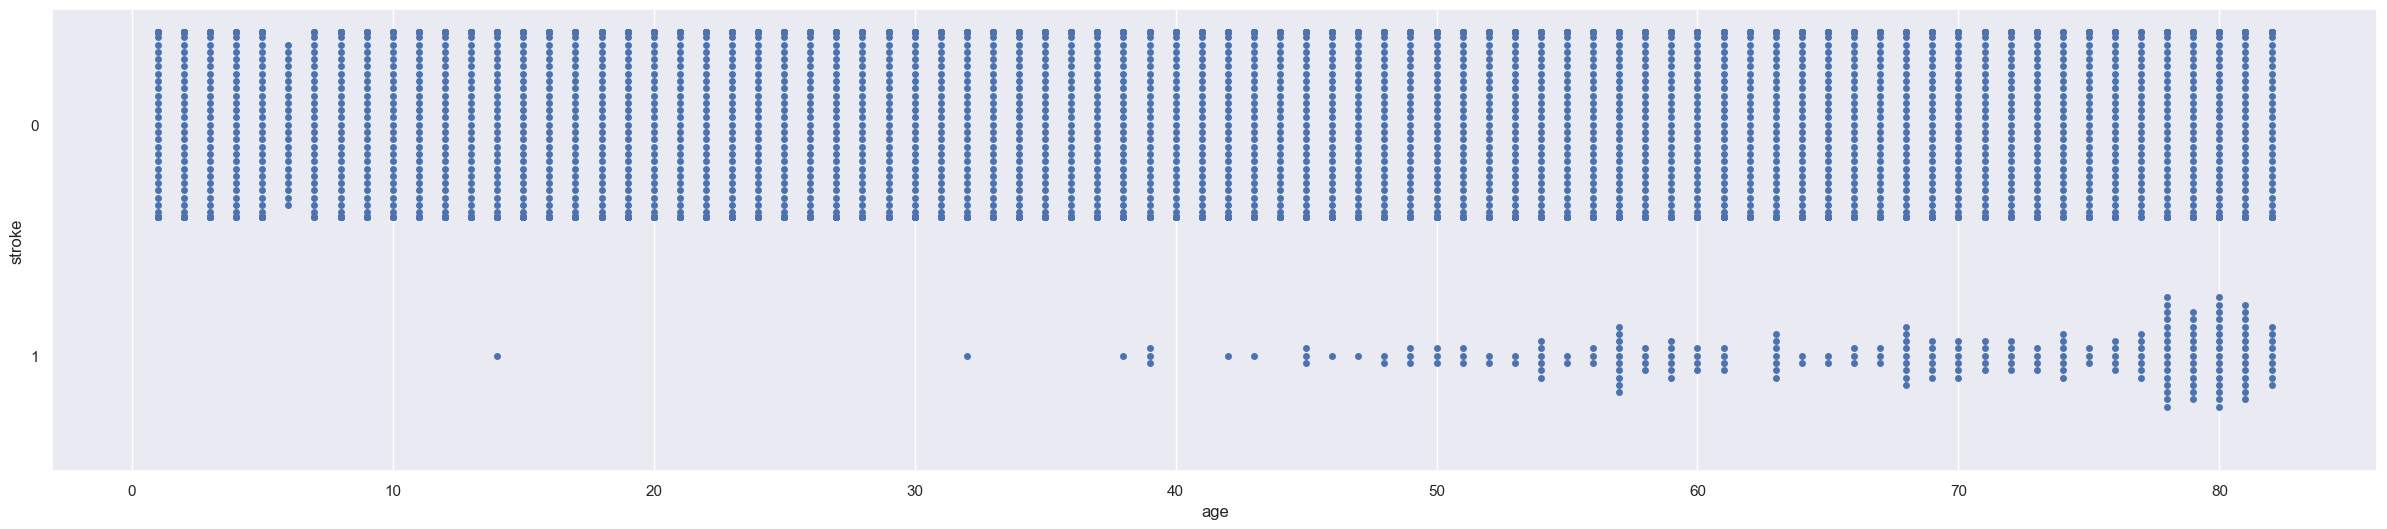

In [16]:
f = plt.figure(figsize=(30, 6))
sb.swarmplot(x = "age", y = "stroke", data = targetds, orient = "h")

Based on the swarmplot, it seems like the older the age, the higher the chances of getting stroke. Though there can be other factors contributing to it, but based on this plot itself, this is what we can infer

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='bmi', ylabel='stroke'>

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


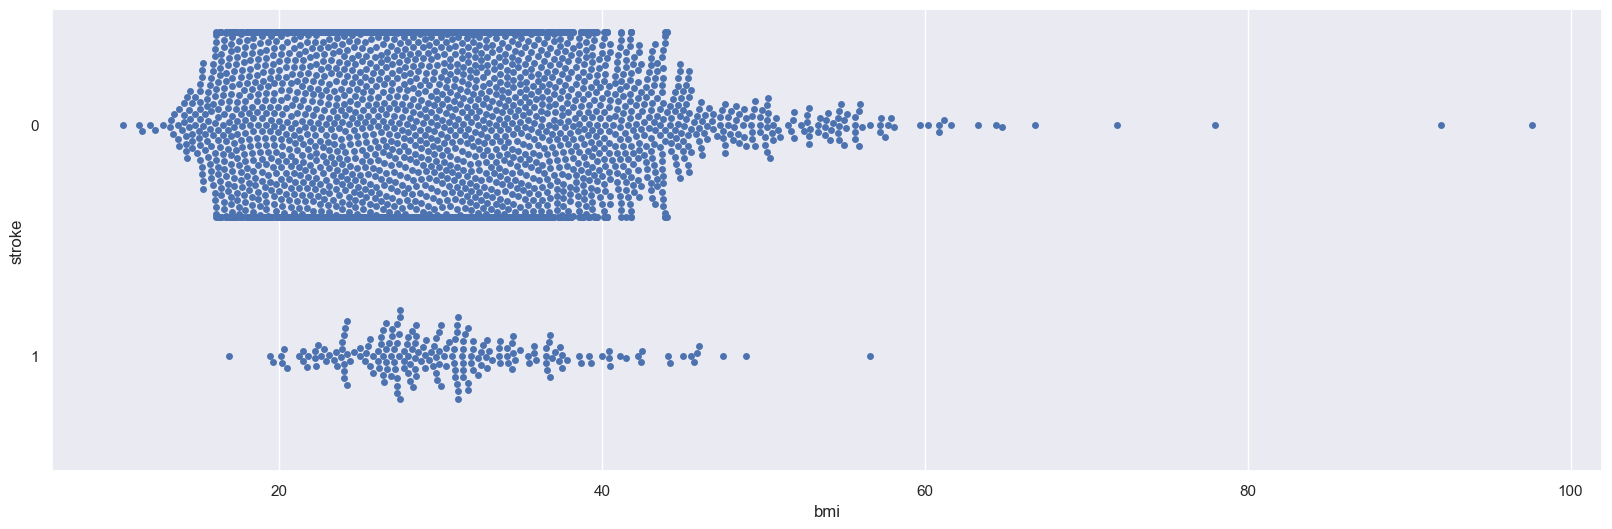

In [17]:
f = plt.figure(figsize=(20, 6))
sb.swarmplot(x = "bmi", y = "stroke", data = targetds, orient = "h")

<Axes: xlabel='bmi', ylabel='Count'>

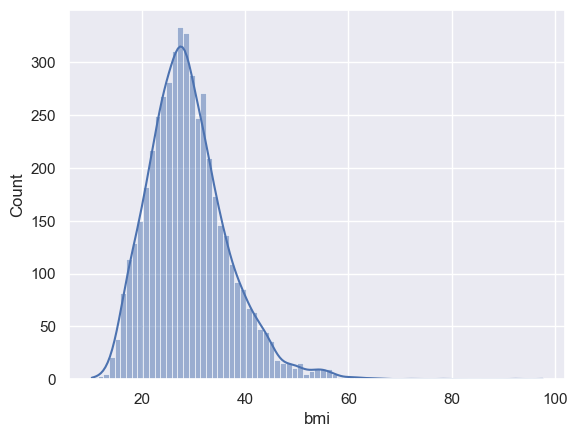

In [18]:
sb.histplot(cleancsv['bmi'], kde = True)

Based on the distribution graph, bmi values around the range of 30 has the highest count in the dataset

<Axes: >

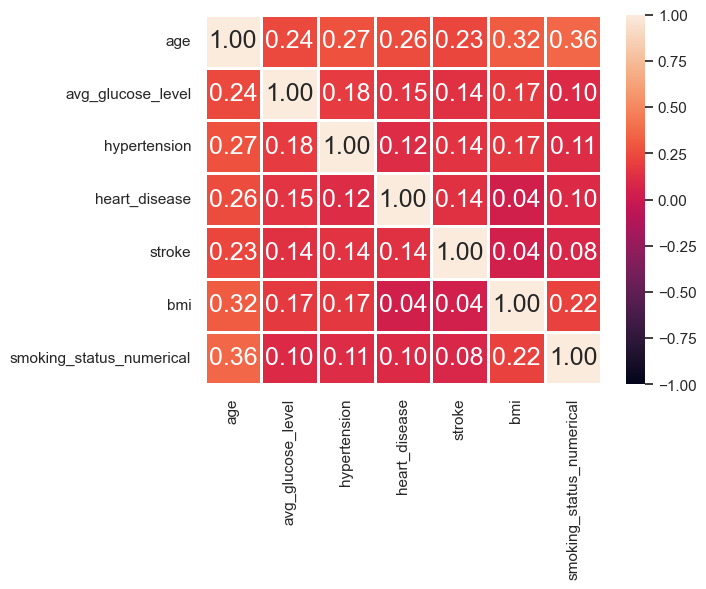

In [19]:
sb.heatmap(targetds.corr(), vmin = -1, vmax = 1, linewidths = 1, annot = True, fmt = ".2f", annot_kws = {"size": 18})

Based on the heatmap, age has the highest correlation among all other variables when compared against stroke. Therefore, using age would be a more suitable candidate in prediciting chances of stroke, as compared to other variables

<Axes: xlabel='age', ylabel='avg_glucose_level'>

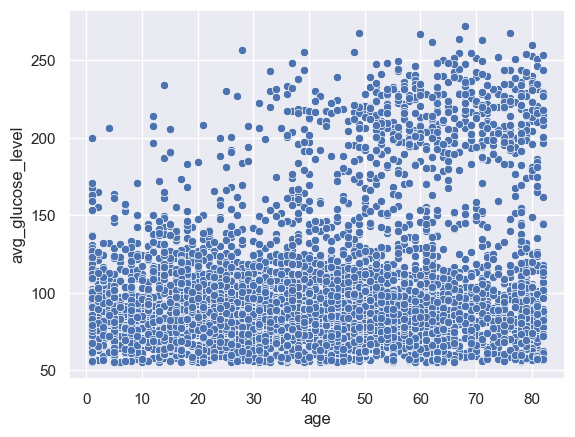

In [20]:
sb.scatterplot(x=cleancsv['age'], y=cleancsv['avg_glucose_level'])

Based on observation, seems like as the age increases, the avg_glucose_level increases too

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


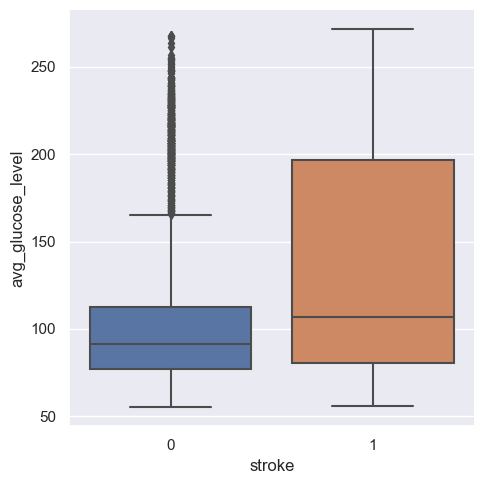

In [21]:
sb.catplot(x='stroke', y="avg_glucose_level", kind="box", data=cleancsv)

It seems that those with stroke has a higher median for glucose level

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


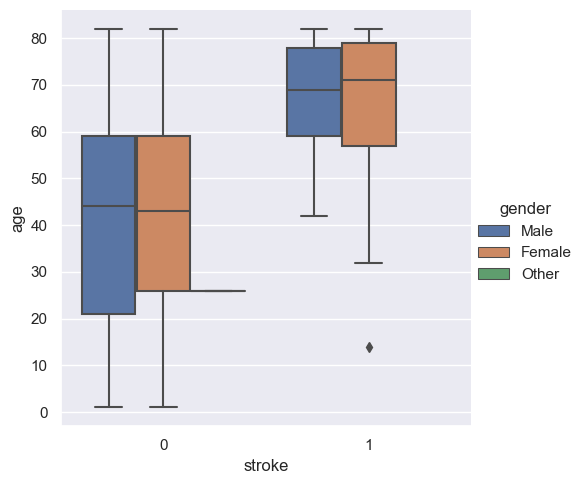

In [22]:
sb.catplot(x='stroke', y="age", hue = 'gender', kind="box", data=cleancsv)

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


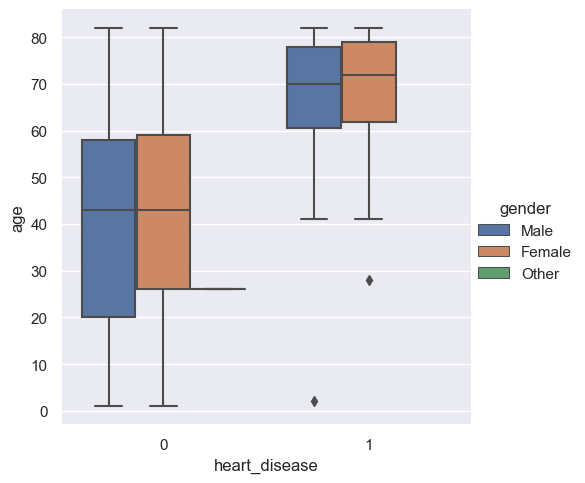

In [23]:
sb.catplot(x='heart_disease', y="age", hue = 'gender', kind="box", data=cleancsv)

/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


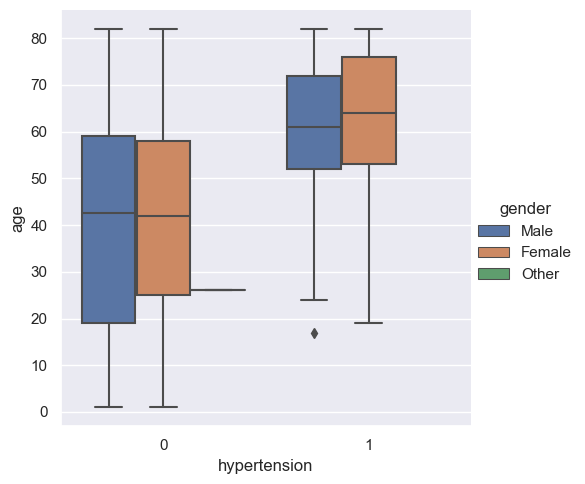

In [24]:
sb.catplot(x='hypertension', y="age", hue = 'gender', kind="box", data=cleancsv)

The general observation from the catplot are that those with hypertension, heart_disease, and stroke tend to arise from those of older age. This could further support the hypothesis that older people have a higher chance of getting a stroke

Moving next, we will setup the decision tree with a few variables to see which variable gives a better prediction

## Classification - Decision Tree

#### Predicting Stroke with BMI

In [25]:
BMI = pd.DataFrame(cleancsv['bmi'])
Stroke = pd.DataFrame(cleancsv['stroke']) 

#Split the data set into train and test randomly, we specify random_state with int value of 2 such that the randomization shuffling happens 2 times across all situations to ensure faireness
BMI_train, BMI_test, Stroke_train, Stroke_test = train_test_split(BMI, Stroke, test_size = 0.25, random_state=2)

#Check the sample sizes
print("Train set is: ", BMI_train.shape, Stroke_train.shape)
print("Test set is: ", BMI_test.shape, Stroke_test.shape)

dectree3 = DecisionTreeClassifier(max_depth = 3)
dectree3.fit(BMI_train,Stroke_train)

Train set is:  (3650, 1) (3650, 1)
Test set is:  (1217, 1) (1217, 1)


DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'BMI <= 22.15\ngini = 0.081\nsamples = 3650\nvalue = [3495, 155]\nclass = N'),
 Text(0.25, 0.625, 'BMI <= 19.35\ngini = 0.021\nsamples = 652\nvalue = [645, 7]\nclass = N'),
 Text(0.125, 0.375, 'BMI <= 16.95\ngini = 0.006\nsamples = 318\nvalue = [317, 1]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.017\nsamples = 120\nvalue = [119, 1]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 198\nvalue = [198, 0]\nclass = N'),
 Text(0.375, 0.375, 'BMI <= 20.55\ngini = 0.035\nsamples = 334\nvalue = [328, 6]\nclass = N'),
 Text(0.3125, 0.125, 'gini = 0.071\nsamples = 135\nvalue = [130, 5]\nclass = N'),
 Text(0.4375, 0.125, 'gini = 0.01\nsamples = 199\nvalue = [198, 1]\nclass = N'),
 Text(0.75, 0.625, 'BMI <= 26.15\ngini = 0.094\nsamples = 2998\nvalue = [2850, 148]\nclass = N'),
 Text(0.625, 0.375, 'BMI <= 24.25\ngini = 0.074\nsamples = 724\nvalue = [696, 28]\nclass = N'),
 Text(0.5625, 0.125, 'gini = 0.103\nsamples = 348\nvalue = [329, 19]\nclass = N'),
 Text(0.6875, 0.1

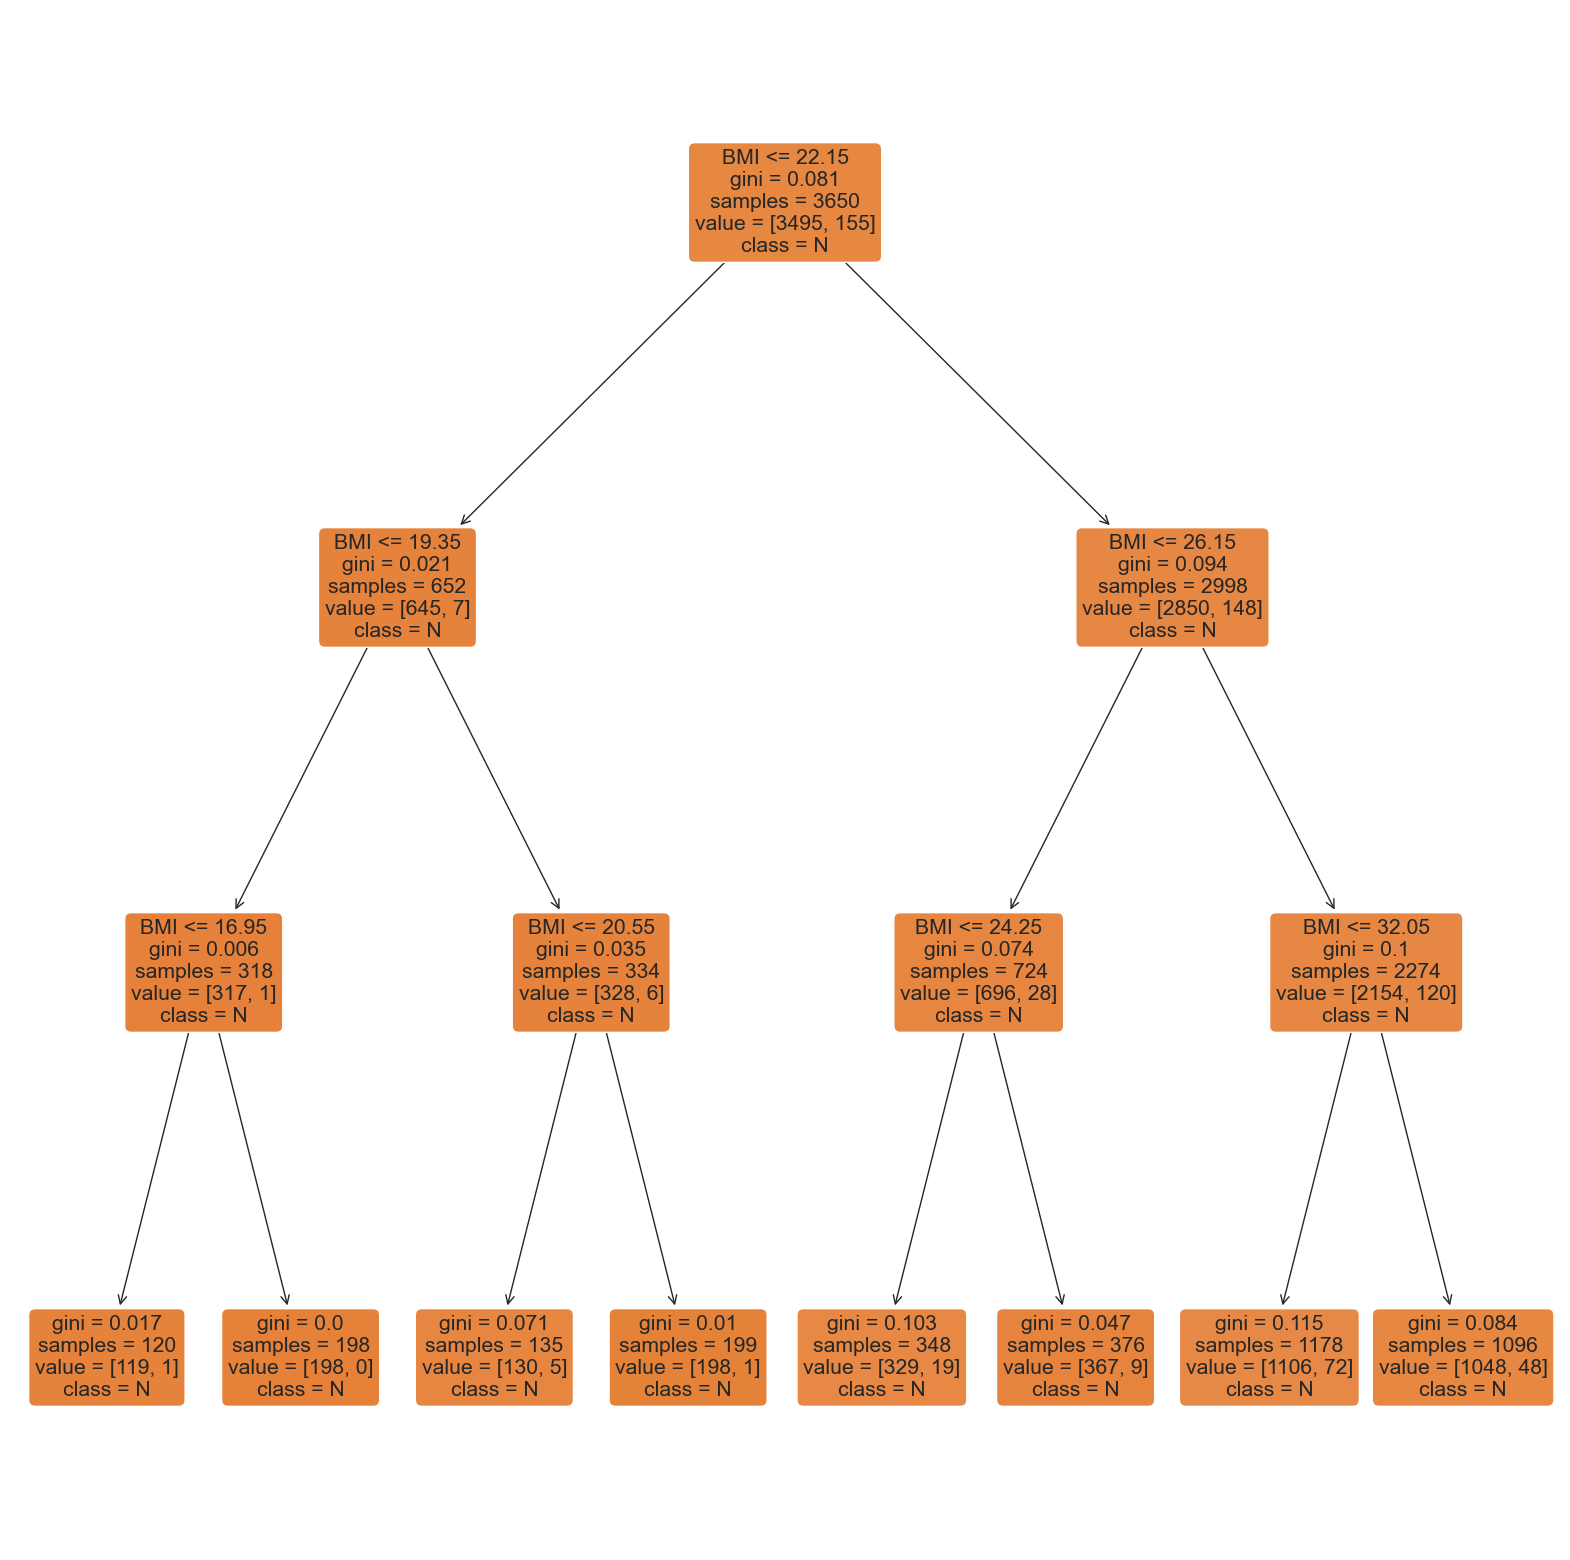

In [26]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree3, filled=True, rounded=True, feature_names=['BMI'], class_names=["N","Y"])

<Axes: >

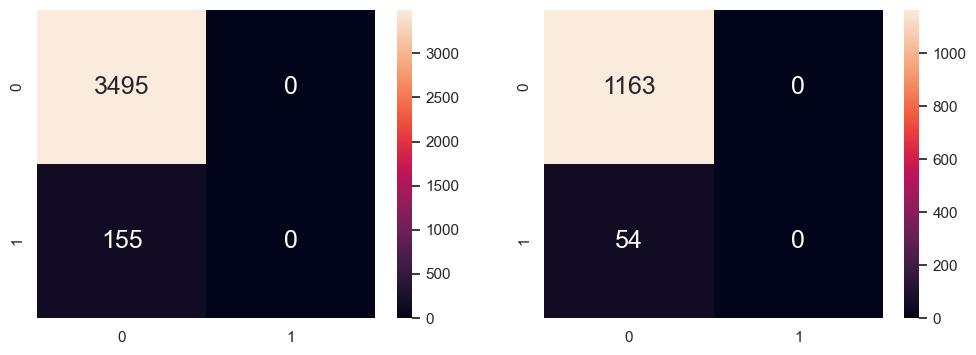

In [27]:
Stroke_train_pred = dectree3.predict(BMI_train)
Stroke_test_pred = dectree3.predict(BMI_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Stroke_train, Stroke_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Stroke_test, Stroke_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [28]:
print("====================================================================")
print("Stroke Classification Accuracy for train is:\t:", dectree3.score(BMI_train, Stroke_train))
print("Stroke Classification Accuracy for test is:\t:", dectree3.score(BMI_test, Stroke_test))
print()

dttrain3Sale = dectree3.score(BMI_train, Stroke_train)
dttest3Sale = dectree3.score(BMI_test, Stroke_test)

cm = confusion_matrix(Stroke_train, Stroke_train_pred)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

print("Stats for train data (max depth 3):")
print("True Positive Rate (TPR): " + str(tpr))
print("False Positive Rate (FPR): " + str(fpr))
print("True Negative Rate (TNR): " + str(tnr))
print("False Negative Rate (FNR): " + str(fnr))

cm = confusion_matrix(Stroke_test, Stroke_test_pred)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

print()
print("Stats for test data (max depth 3):")
print("True Positive Rate (TPR): " + str(tpr))
print("False Positive Rate (FPR): " + str(fpr))
print("True Negative Rate (TNR): " + str(tnr))
print("False Negative Rate (FNR): " + str(fnr))

Stroke Classification Accuracy for train is:	: 0.9575342465753425
Stroke Classification Accuracy for test is:	: 0.9556285949055053

Stats for train data (max depth 3):
True Positive Rate (TPR): 0.0
False Positive Rate (FPR): 0.0
True Negative Rate (TNR): 1.0
False Negative Rate (FNR): 1.0

Stats for test data (max depth 3):
True Positive Rate (TPR): 0.0
False Positive Rate (FPR): 0.0
True Negative Rate (TNR): 1.0
False Negative Rate (FNR): 1.0


#### Predicting Stroke with avg_glucose_level

In [29]:
AGL = pd.DataFrame(cleancsv['avg_glucose_level'])
Stroke = pd.DataFrame(cleancsv['stroke']) 

#Split the data set into train and test randomly, we specify random_state with int value of 2 such that the randomization shuffling happens 2 times across all situations to ensure faireness
AGL_train, AGL_test, Stroke_train, Stroke_test = train_test_split(AGL, Stroke, test_size = 0.25, random_state=2)

#Check the sample sizes
print("Train set is: ", AGL_train.shape, Stroke_train.shape)
print("Test set is: ", AGL_test.shape, Stroke_test.shape)

dectree3 = DecisionTreeClassifier(max_depth = 3)
dectree3.fit(AGL_train,Stroke_train)

Train set is:  (3650, 1) (3650, 1)
Test set is:  (1217, 1) (1217, 1)


DecisionTreeClassifier(max_depth=3)

[Text(0.5416666666666666, 0.875, 'Avg Glucose Level <= 185.085\ngini = 0.081\nsamples = 3650\nvalue = [3495, 155]\nclass = N'),
 Text(0.3333333333333333, 0.625, 'Avg Glucose Level <= 162.09\ngini = 0.062\nsamples = 3270\nvalue = [3166.0, 104.0]\nclass = N'),
 Text(0.16666666666666666, 0.375, 'Avg Glucose Level <= 144.965\ngini = 0.061\nsamples = 3202\nvalue = [3102, 100]\nclass = N'),
 Text(0.08333333333333333, 0.125, 'gini = 0.062\nsamples = 3116\nvalue = [3016, 100]\nclass = N'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 86\nvalue = [86, 0]\nclass = N'),
 Text(0.5, 0.375, 'Avg Glucose Level <= 162.235\ngini = 0.111\nsamples = 68\nvalue = [64, 4]\nclass = N'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(0.5833333333333334, 0.125, 'gini = 0.086\nsamples = 67\nvalue = [64, 3]\nclass = N'),
 Text(0.75, 0.625, 'Avg Glucose Level <= 185.22\ngini = 0.232\nsamples = 380\nvalue = [329, 51]\nclass = N'),
 Text(0.6666666666666666, 0.375, 'gini =

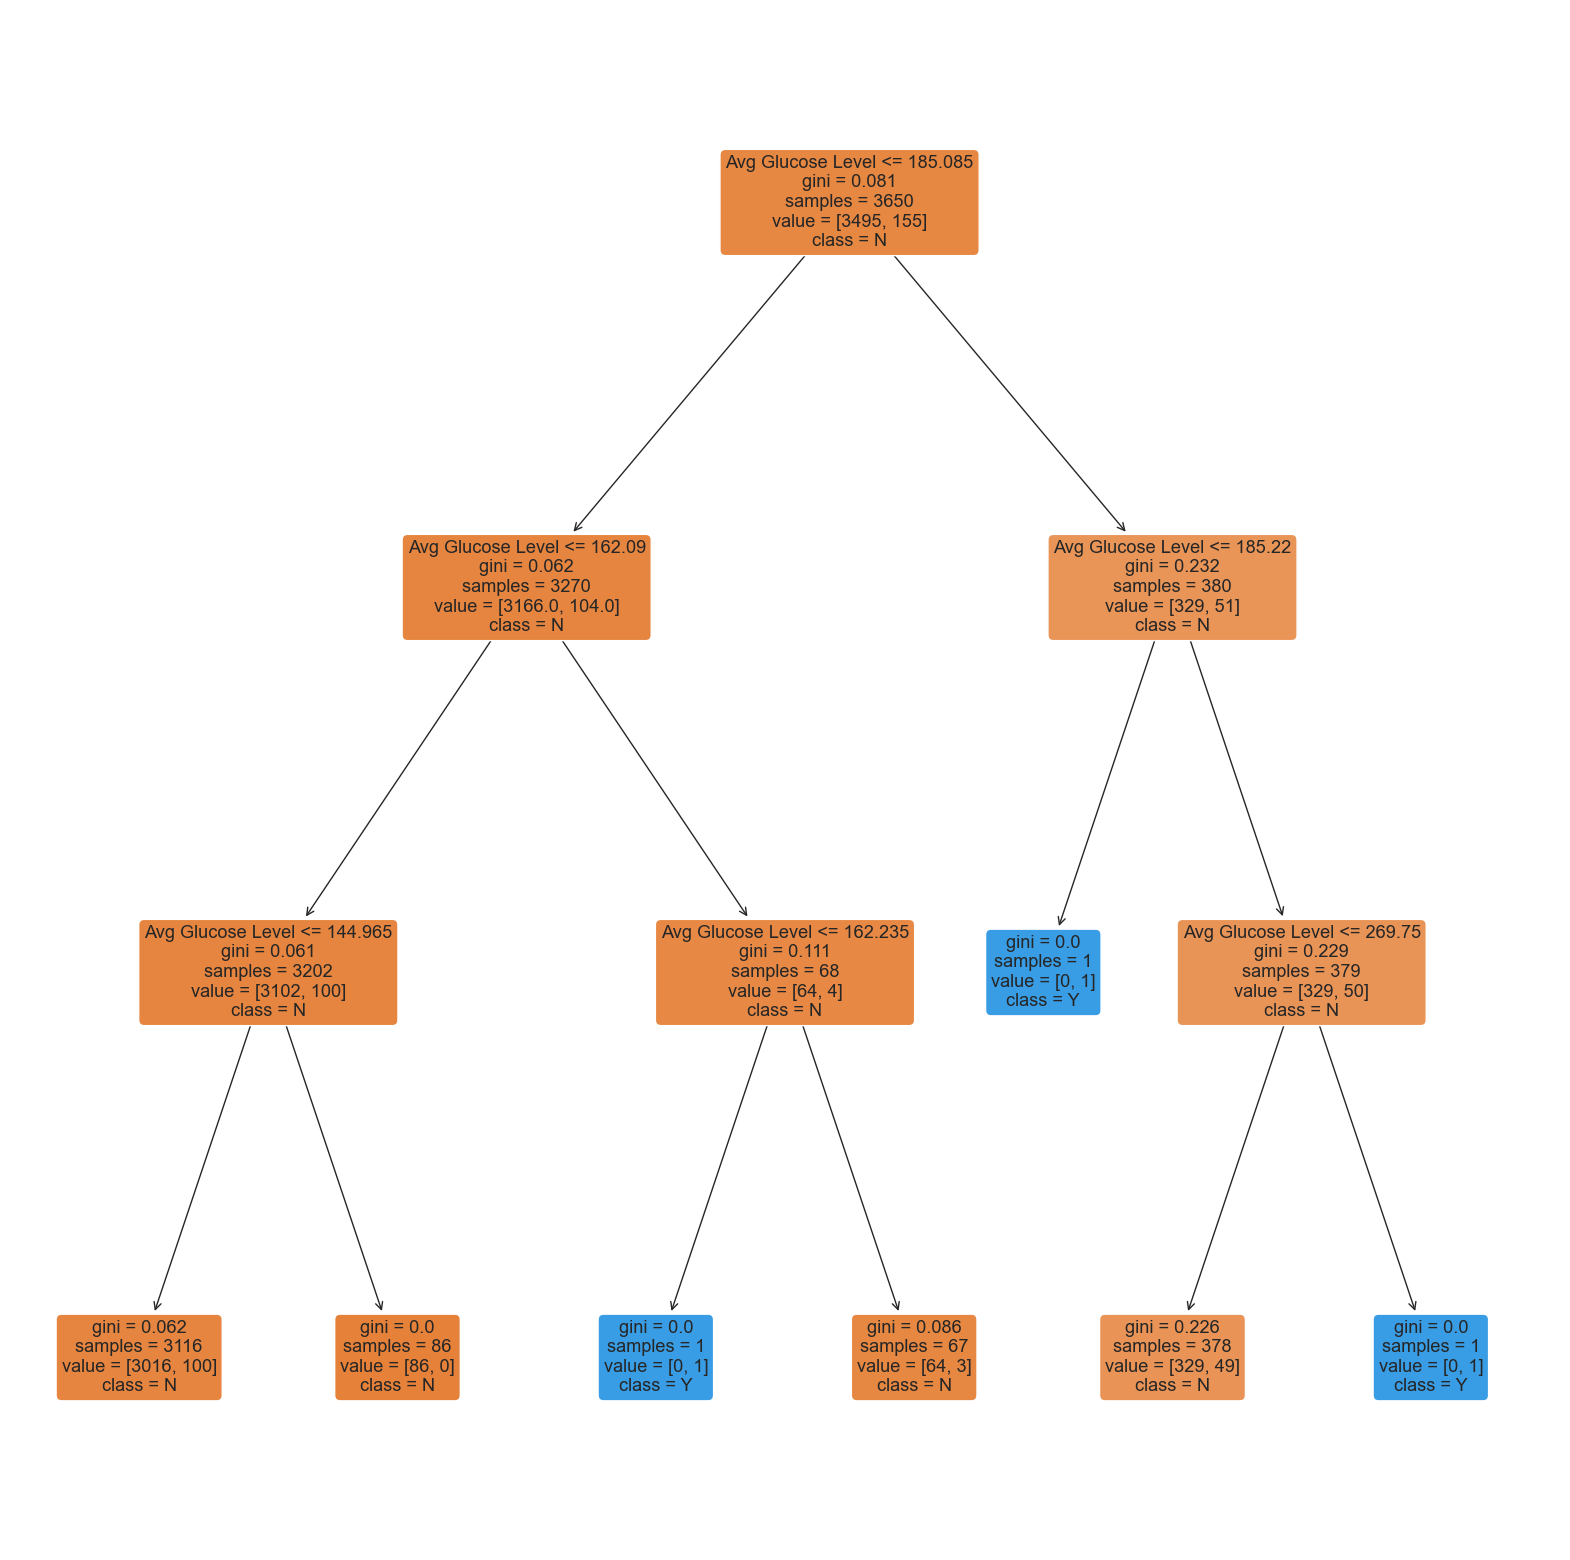

In [30]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree3, filled=True, rounded=True, feature_names=['Avg Glucose Level'], class_names=["N","Y"])

<Axes: >

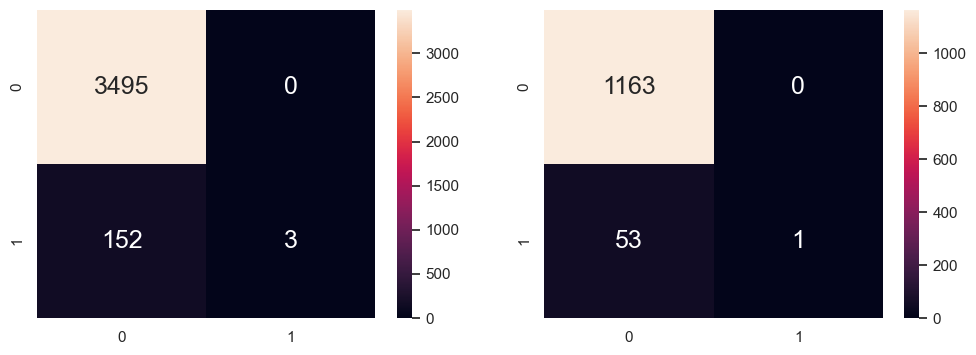

In [31]:
Stroke_train_pred = dectree3.predict(AGL_train)
Stroke_test_pred = dectree3.predict(AGL_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Stroke_train, Stroke_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Stroke_test, Stroke_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [32]:
print("====================================================================")
print("Stroke Classification Accuracy for train is:\t:", dectree3.score(AGL_train, Stroke_train))
print("Stroke Classification Accuracy for test is:\t:", dectree3.score(AGL_test, Stroke_test))
print()

dttrain3Sale = dectree3.score(AGL_train, Stroke_train)
dttest3Sale = dectree3.score(AGL_test, Stroke_test)

cm = confusion_matrix(Stroke_train, Stroke_train_pred)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

print("Stats for train data (max depth 3):")
print("True Positive Rate (TPR): " + str(tpr))
print("False Positive Rate (FPR): " + str(fpr))
print("True Negative Rate (TNR): " + str(tnr))
print("False Negative Rate (FNR): " + str(fnr))

cm = confusion_matrix(Stroke_test, Stroke_test_pred)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

print()
print("Stats for test data (max depth 3):")
print("True Positive Rate (TPR): " + str(tpr))
print("False Positive Rate (FPR): " + str(fpr))
print("True Negative Rate (TNR): " + str(tnr))
print("False Negative Rate (FNR): " + str(fnr))

Stroke Classification Accuracy for train is:	: 0.9583561643835616
Stroke Classification Accuracy for test is:	: 0.9564502875924404

Stats for train data (max depth 3):
True Positive Rate (TPR): 0.01935483870967742
False Positive Rate (FPR): 0.0
True Negative Rate (TNR): 1.0
False Negative Rate (FNR): 0.9806451612903225

Stats for test data (max depth 3):
True Positive Rate (TPR): 0.018518518518518517
False Positive Rate (FPR): 0.0
True Negative Rate (TNR): 1.0
False Negative Rate (FNR): 0.9814814814814815


#### Predicting Stroke with age

In [33]:
Age = pd.DataFrame(cleancsv['age'])
Stroke = pd.DataFrame(cleancsv['stroke']) 

#Split the data set into train and test randomly, we specify random_state with int value of 2 such that the randomization shuffling happens 2 times across all situations to ensure faireness
Age_train, Age_test, Stroke_train, Stroke_test = train_test_split(Age, Stroke, test_size = 0.25, random_state=2)

#Check the sample sizes
print("Train set is: ", Age_train.shape, Stroke_train.shape)
print("Test set is: ", Age_test.shape, Stroke_test.shape)

dectree3 = DecisionTreeClassifier(max_depth = 3)
dectree3.fit(Age_train,Stroke_train)

Train set is:  (3650, 1) (3650, 1)
Test set is:  (1217, 1) (1217, 1)


DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'Age <= 67.5\ngini = 0.081\nsamples = 3650\nvalue = [3495, 155]\nclass = N'),
 Text(0.25, 0.625, 'Age <= 55.5\ngini = 0.042\nsamples = 3058\nvalue = [2992, 66]\nclass = N'),
 Text(0.125, 0.375, 'Age <= 44.5\ngini = 0.02\nsamples = 2475\nvalue = [2450.0, 25.0]\nclass = N'),
 Text(0.0625, 0.125, 'gini = 0.008\nsamples = 1828\nvalue = [1821, 7]\nclass = N'),
 Text(0.1875, 0.125, 'gini = 0.054\nsamples = 647\nvalue = [629, 18]\nclass = N'),
 Text(0.375, 0.375, 'Age <= 59.5\ngini = 0.131\nsamples = 583\nvalue = [542, 41]\nclass = N'),
 Text(0.3125, 0.125, 'gini = 0.173\nsamples = 219\nvalue = [198, 21]\nclass = N'),
 Text(0.4375, 0.125, 'gini = 0.104\nsamples = 364\nvalue = [344, 20]\nclass = N'),
 Text(0.75, 0.625, 'Age <= 77.5\ngini = 0.255\nsamples = 592\nvalue = [503, 89]\nclass = N'),
 Text(0.625, 0.375, 'Age <= 68.5\ngini = 0.203\nsamples = 331\nvalue = [293, 38]\nclass = N'),
 Text(0.5625, 0.125, 'gini = 0.312\nsamples = 31\nvalue = [25, 6]\nclass = N'),
 Text(0.687

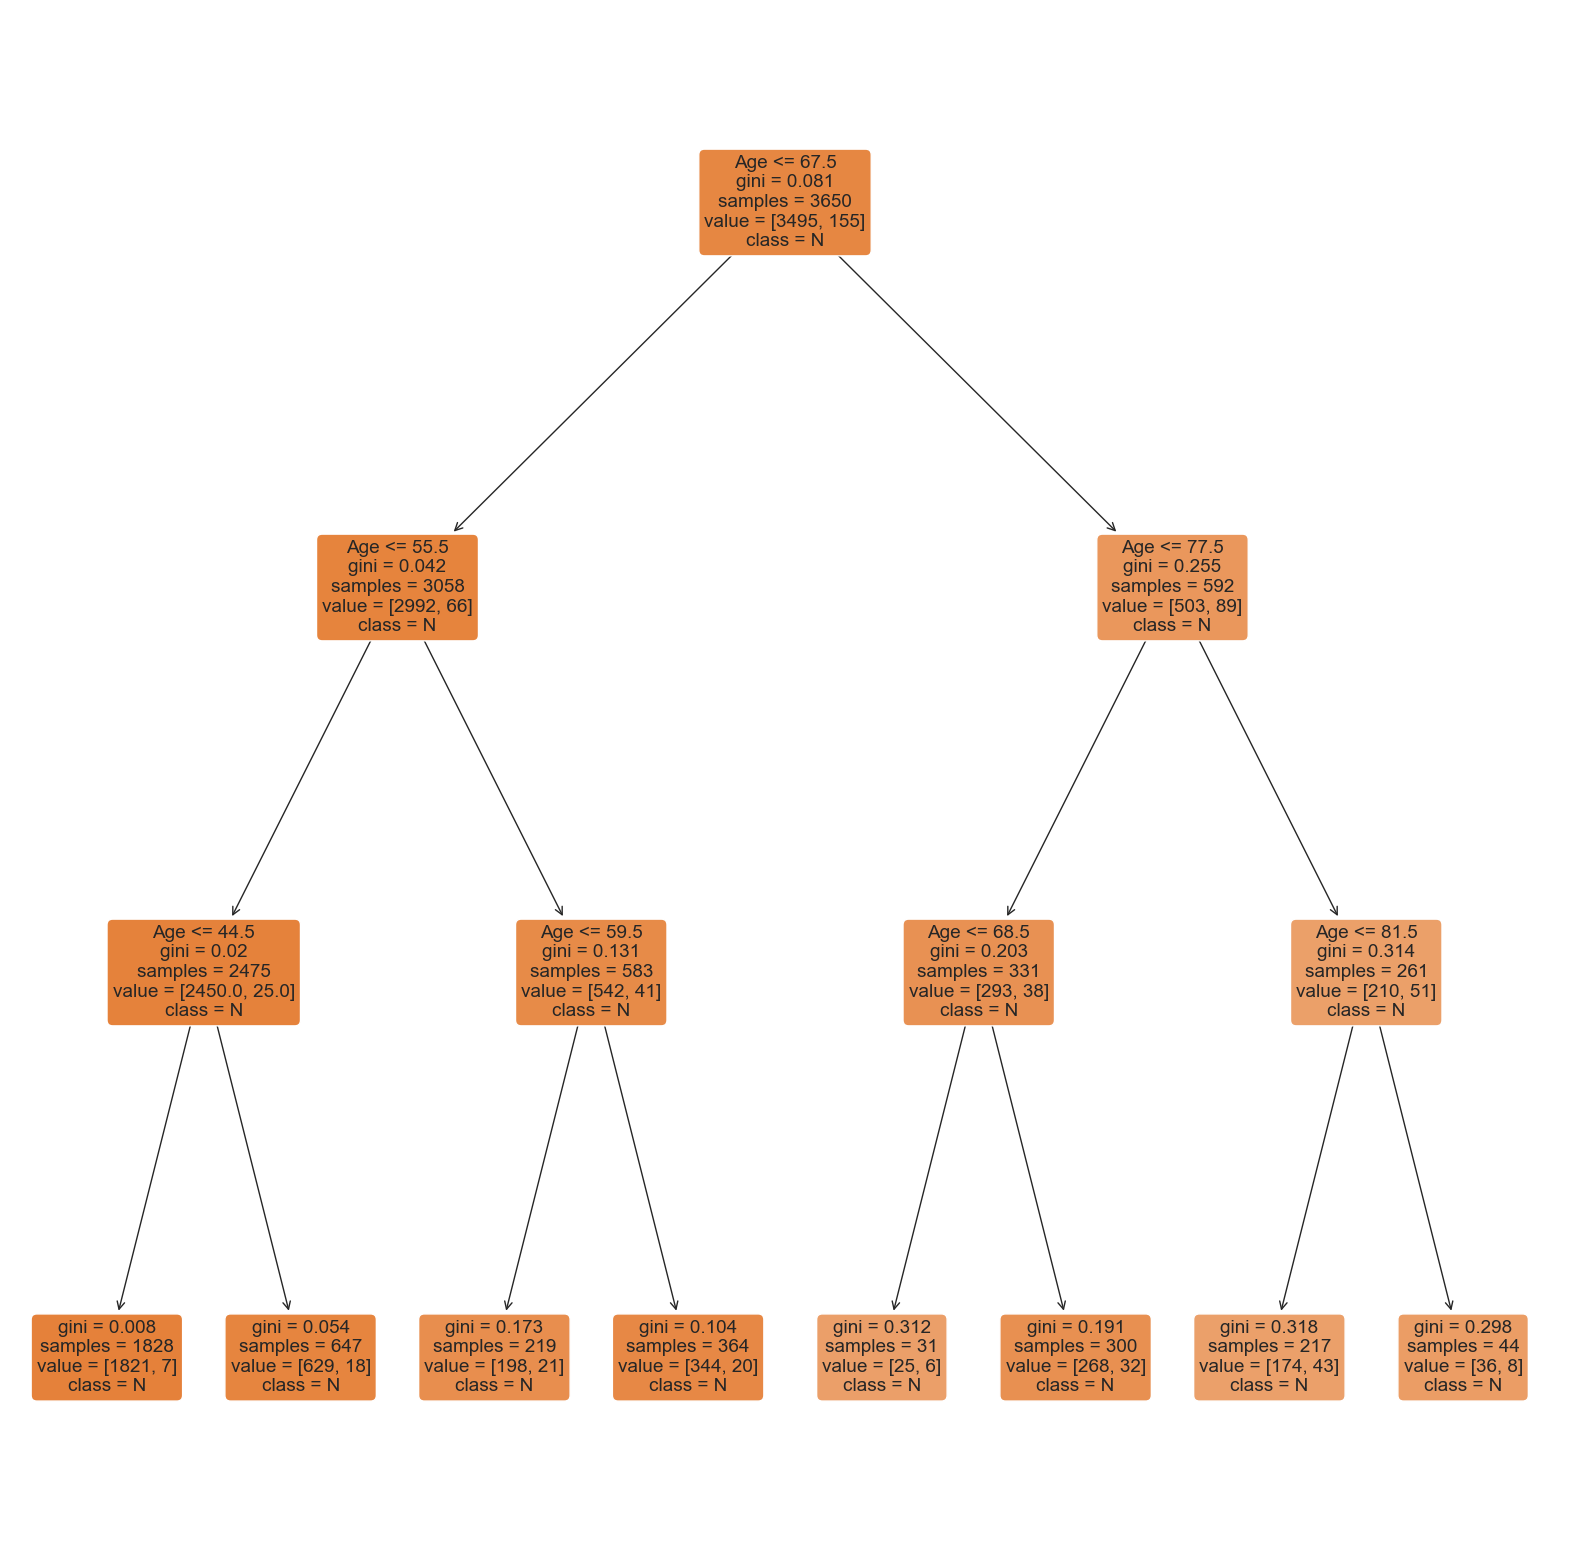

In [34]:
f = plt.figure(figsize=(20,20))
plot_tree(dectree3, filled=True, rounded=True, feature_names=['Age'], class_names=["N","Y"])

<Axes: >

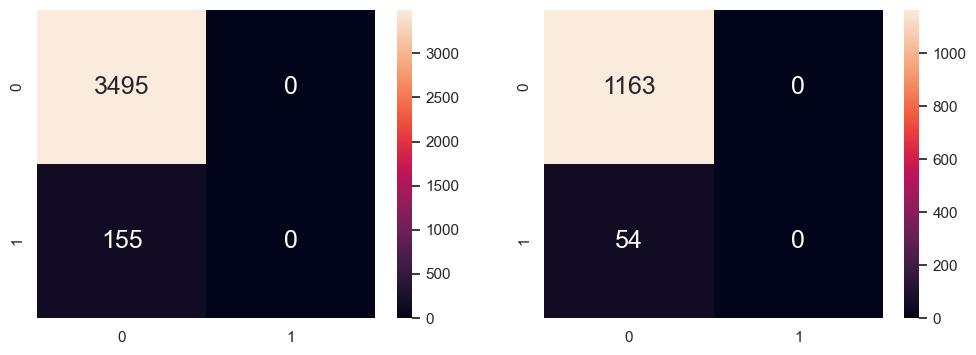

In [35]:
Stroke_train_pred = dectree3.predict(Age_train)
Stroke_test_pred = dectree3.predict(Age_test)

f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(Stroke_train, Stroke_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Stroke_test, Stroke_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [36]:
print("====================================================================")
print("Stroke Classification Accuracy for train is:\t:", dectree3.score(Age_train, Stroke_train))
print("Stroke Classification Accuracy for test is:\t:", dectree3.score(Age_test, Stroke_test))
print()

dttrain3Sale = dectree3.score(Age_train, Stroke_train)
dttest3Sale = dectree3.score(Age_test, Stroke_test)

cm = confusion_matrix(Stroke_train, Stroke_train_pred)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

print("Stats for train data (max depth 3):")
print("True Positive Rate (TPR): " + str(tpr))
print("False Positive Rate (FPR): " + str(fpr))
print("True Negative Rate (TNR): " + str(tnr))
print("False Negative Rate (FNR): " + str(fnr))

cm = confusion_matrix(Stroke_test, Stroke_test_pred)
tn, fp, fn, tp = cm.ravel()
fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)
fnr = fn / (tp + fn)

print()
print("Stats for test data (max depth 3):")
print("True Positive Rate (TPR): " + str(tpr))
print("False Positive Rate (FPR): " + str(fpr))
print("True Negative Rate (TNR): " + str(tnr))
print("False Negative Rate (FNR): " + str(fnr))

Stroke Classification Accuracy for train is:	: 0.9575342465753425
Stroke Classification Accuracy for test is:	: 0.9556285949055053

Stats for train data (max depth 3):
True Positive Rate (TPR): 0.0
False Positive Rate (FPR): 0.0
True Negative Rate (TNR): 1.0
False Negative Rate (FNR): 1.0

Stats for test data (max depth 3):
True Positive Rate (TPR): 0.0
False Positive Rate (FPR): 0.0
True Negative Rate (TNR): 1.0
False Negative Rate (FNR): 1.0


### Conclusion from Classification Decision Tree

From the 3 classification trees that are plotted, it seems that Avg Glucose Level has a higher classification accuracy compared to BMI and Age. Though it may not be a lot, but its still the better one among them. However, we notice that the printed decision tree leans towards predicting "No Stroke", this is not a good result. Hence we will resample the dataset when we are doing logistic regression to improve the results.

## Logistic Regression

#### Cleaning the dataframe for Logistic Regression

We will make a copy of cleancsv data (without the column: stroke) and removed smoking_status for Logistic Regression

In [37]:
cleancsv_copy = cleancsv.copy()
strokeCol = cleancsv_copy.pop('stroke')

#Drop smoking_status column (since we alr have the numerical ver)
cleancsv_copy.drop(columns=['smoking_status'], inplace=True)
cleancsv_copy.head()

gender  age  hypertension  heart_disease ever_married      work_type  \
0    Male   67             0              1          Yes        Private   
2    Male   80             0              1          Yes        Private   
3  Female   49             0              0          Yes        Private   
4  Female   79             1              0          Yes  Self-employed   
5    Male   81             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi  smoking_status_numerical  
0          Urban             228.69  36.6                         3  
2          Rural             105.92  32.5                         1  
3          Urban             171.23  34.4                         2  
4          Rural             174.12  24.0                         1  
5          Urban             186.21  29.0                         3

In [38]:
cleancsvM = pd.DataFrame(cleancsv_copy)

❗When faced with the error: "ValueError: could not convert string to float: 'Male'", It is because logistic regression only takes in numerical data, not categorical variable.

To solve this , we will use one-hot encoding (only categorical variable will be assigned numerical values)

#### One-hot encoding

In [39]:
#One-hot encoding
cleancsvM_encoded = pd.get_dummies(cleancsvM)

#### Logistic Regression without resampling

In [40]:
# Assuming X contains your predictor variables and y contains the target variable ('stroke')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleancsvM_encoded, strokeCol, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("")

# Generate a classification report
y_true = ['No Stroke' if label == 0 else 'Stroke' for label in y_test]
y_pred = ['No Stroke' if label == 0 else 'Stroke' for label in y_pred]

# Generate the classification report with custom class labels
print(classification_report(y_true, y_pred))

Accuracy: 0.944558521560575

              precision    recall  f1-score   support

   No Stroke       0.94      1.00      0.97       920
      Stroke       0.00      0.00      0.00        54

    accuracy                           0.94       974
   macro avg       0.47      0.50      0.49       974
weighted avg       0.89      0.94      0.92       974



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill

#### Resample the whole dataframe: cleancsvM

In [41]:
# Define the resampling strategy (e.g., SMOTE for oversampling, RandomUnderSampler for undersampling)
oversample = SMOTE(random_state=42)
undersample = RandomUnderSampler(random_state=42)

# Define the resampling pipeline (e.g., oversample then undersample)
resampling_pipeline = Pipeline(steps=[('oversample', oversample), ('undersample', undersample)])

# Apply the resampling pipeline to the entire dataset (X and y)
cleancsvM_encoded_resampled, strokeCol_resampled = resampling_pipeline.fit_resample(cleancsvM_encoded, strokeCol)

In [42]:
cleancsvM_encoded_resampled.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  \
209    3             0              0              95.12  18.0   
210   58             1              0              87.96  39.2   
211    8             0              0             110.89  17.6   
212   70             0              0              69.04  35.9   
213   14             0              0             161.28  19.1   

     smoking_status_numerical  gender_Female  gender_Male  gender_Other  \
209                         0          False         True         False   
210                         1          False         True         False   
211                         0           True        False         False   
212                         3           True        False         False   
213                         0          False         True         False   

     ever_married_No  ever_married_Yes  work_type_Govt_job  \
209             True             False               False   
210            False              True               False   
211             True             False               False   
212            False              True               False   
213             True             False               False   

     work_type_Never_worked  work_type_Private  work_type_Self-employed  \
209                   False              False                    False   
210                   False               True                    False   
211                   False               True                    False   
212                   False               True                    False   
213                    True              False                    False   

     work_type_children  Residence_type_Rural  Residence_type_Urban  
209                True                  True                 False  
210               False                 False                  True  
211               False                 False                  True  
212               False                  True                 False  
213               False                  True                 False

In [43]:
strokeCol_resampled.head()

209    0
210    0
211    0
212    0
213    0
Name: stroke, dtype: int64

#### Logistic Regression with resampling

In [44]:
# Assuming X contains your predictor variables and y contains the target variable ('stroke')
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cleancsvM_encoded_resampled, strokeCol_resampled, test_size=0.2, random_state=42)

# Create an instance of LogisticRegression
logistic_reg = LogisticRegression(random_state=42)

# Train the logistic regression model
logistic_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("")

# Generate a classification report
y_true = ['No Stroke' if label == 0 else 'Stroke' for label in y_test]
y_pred = ['No Stroke' if label == 0 else 'Stroke' for label in y_pred]

# Generate the classification report with custom class labels
print(classification_report(y_true, y_pred))

Accuracy: 0.9055793991416309

              precision    recall  f1-score   support

   No Stroke       0.85      0.99      0.91       939
      Stroke       0.99      0.82      0.90       925

    accuracy                           0.91      1864
   macro avg       0.92      0.90      0.90      1864
weighted avg       0.92      0.91      0.90      1864



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Finding out which variable has the most significant impact on predicting stroke 

1. Higher +coefficient -> Higher impact on predicting stroke
2. Higher -coefficient -> Higher impact on predicting no-stroke

In [45]:
# Get the coefficients and intercept from the trained logistic regression model
coefficients = logistic_reg.coef_[0]  # Extract coefficients for the first class (assuming binary classification)
intercept = logistic_reg.intercept_[0]

# Get the column names from your dataset (assuming cleancsvM_encoded contains your features)
feature_names = cleancsvM_encoded.columns

# Create a dictionary to map feature names to coefficients
feature_coefficients = dict(zip(feature_names, coefficients))

# Print the feature coefficients
print("Feature Coefficients:")
for feature, coefficient in feature_coefficients.items():
    print(f"{feature:<20}: {coefficient:.4f}")

# Print the intercept
print("\nIntercept:", intercept)

Feature Coefficients:
age                 : 0.0329
hypertension        : -0.3435
heart_disease       : -1.2014
avg_glucose_level   : 0.0033
bmi                 : -0.0611
smoking_status_numerical: -0.2447
gender_Female       : 3.6562
gender_Male         : 3.9117
gender_Other        : -0.0111
ever_married_No     : 0.0231
ever_married_Yes    : -0.2589
work_type_Govt_job  : 4.3460
work_type_Never_worked: -0.1444
work_type_Private   : 4.8932
work_type_Self-employed: 4.5113
work_type_children  : -2.6889
Residence_type_Rural: 4.8434
Residence_type_Urban: 5.0137

Intercept: -14.486830309988841


**Statistics and observations:**

    gender_Female       : 3.6562
    gender_Male         : 3.9117

Despite, both female and male having high coefficient as compared to the rest, they are about the same which clearly tells us gender does not demonstrate a statistically significant difference in the likelihood of getting a stroke.

    work_type_Govt_job  : 4.3460
    work_type_Private   : 4.8932
    work_type_Self-employed: 4.5113
    work_type_children  : -2.6889

Among the 5 types of work, the government, private and self-employed job may be a significant predictor of stroke risk as compared to the rest. Interestingly, the job involving children has a negative coefficient, suggesting it has the least significant impact on predicting stroke and may have a higher impact on predicting no-stroke.

    Residence_type_Rural: 4.8434
    Residence_type_Urban: 5.0137
Similar to the gender variable, the residence type does not demonstrate a statistically significant difference in the likelihood of getting a stroke despite it high coefficient.

## Random Forest (Primary Model) + Logistic Regression (Secondary Model)


By using the predicted probabilities from the Random Forest model as features for Logistic Regression, we are providing additional information to the Logistic Regression model. These predicted probabilities represent the Random Forest model's confidence in its predictions for each class.

When we concatenate these probabilities with the original features and train the Logistic Regression model, it learns from both the original features and the additional information provided by the Random Forest probabilities. This can potentially improve the model's ability to capture complex relationships in the data and make more accurate predictions.

In essence, the Logistic Regression model learns to weigh the importance of each feature (including the predicted probabilities) when making predictions. By considering the probabilities assigned by the Random Forest model, the Logistic Regression model gains insights into the uncertainty or confidence associated with each prediction, which can lead to improved accuracy and generalization performance.

Overall, this approach leverages the strengths of both Random Forest and Logistic Regression models, combining their capabilities to create a more robust and accurate predictive model.

## ⬇️More information⬇️

Basically, using random forest on this dataframe (which is already resampled, encoded) to generate a probability of stroke and add this to the temporary dataframe called (X_train_combined & X_test_combined)  as another column/variable. Now, we do logistic regression on this dataframe and it will take into consideration the probability of stroke together with the other variable to predict Stroke. Undoubtedly, the accuracy is way higher so we think we should include the one we did without random forest to prove a substantial improvement in accuracy.

In [46]:
cleancsvM_encoded_resampled.head()

age  hypertension  heart_disease  avg_glucose_level   bmi  \
209    3             0              0              95.12  18.0   
210   58             1              0              87.96  39.2   
211    8             0              0             110.89  17.6   
212   70             0              0              69.04  35.9   
213   14             0              0             161.28  19.1   

     smoking_status_numerical  gender_Female  gender_Male  gender_Other  \
209                         0          False         True         False   
210                         1          False         True         False   
211                         0           True        False         False   
212                         3           True        False         False   
213                         0          False         True         False   

     ever_married_No  ever_married_Yes  work_type_Govt_job  \
209             True             False               False   
210            False              True               False   
211             True             False               False   
212            False              True               False   
213             True             False               False   

     work_type_Never_worked  work_type_Private  work_type_Self-employed  \
209                   False              False                    False   
210                   False               True                    False   
211                   False               True                    False   
212                   False               True                    False   
213                    True              False                    False   

     work_type_children  Residence_type_Rural  Residence_type_Urban  
209                True                  True                 False  
210               False                 False                  True  
211               False                 False                  True  
212               False                  True                 False  
213               False                  True                 False

In [47]:
# Split the data into training and testing sets for Random Forest
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(cleancsvM_encoded_resampled, strokeCol_resampled, test_size=0.2, random_state=42)

# Train a Random Forest Model
random_forest = RandomForestClassifier()
random_forest.fit(X_rf_train, y_rf_train)

# Generate Predicted Probabilities for Random Forest
rf_probabilities_train = random_forest.predict_proba(X_rf_train)
rf_probabilities_test = random_forest.predict_proba(X_rf_test)

# Concatenate Predicted Probabilities with Original Features
X_train_combined = np.hstack((X_rf_train, rf_probabilities_train))
X_test_combined = np.hstack((X_rf_test, rf_probabilities_test))

# Train a Logistic Regression Model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_combined, y_rf_train)

# Generate predictions for test data
logistic_regression_predictions = logistic_regression.predict(X_test_combined)

# Calculate accuracy
accuracy = accuracy_score(y_rf_test, logistic_regression_predictions)
print("Accuracy:", accuracy)
print("")


# Generate a classification report with custom class labels
print("Classification Report:")
print(classification_report(y_rf_test, logistic_regression_predictions, target_names=['No Stroke', 'Stroke']))


Accuracy: 0.9758583690987125

Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.96      0.99      0.98       939
      Stroke       0.99      0.96      0.98       925

    accuracy                           0.98      1864
   macro avg       0.98      0.98      0.98      1864
weighted avg       0.98      0.98      0.98      1864



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Comparing the two models:
1. 1st Model: Logistic Regression without Random Forest
2. 2nd Model: Logisitic Regression with Random Forest

It's evident that Logistic Regression with Random Forest as features outperforms Logistic Regression without Random Forest in terms of accuracy, precision, recall, and F1-score for both classes (No Stroke and Stroke). This suggests that incorporating Random Forest predictions as features improves the predictive performance of the logistic regression model.

# Hyperparameter tuning using GridSearch
Note: This portion of the code takes some time to run as it processes through 300 trees...be patient :)

In [48]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Perform grid search cross-validation
grid_search.fit(X_rf_train, y_rf_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score (Accuracy):", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score (Accuracy): 0.9730272462515586


In [49]:
# Create a Random Forest classifier with the best parameters
best_rf_classifier = RandomForestClassifier(n_estimators=best_params['n_estimators'],
                                            max_depth=best_params['max_depth'],
                                            min_samples_split=best_params['min_samples_split'],
                                            min_samples_leaf=best_params['min_samples_leaf'],
                                            random_state=42)

# Retrain the Random Forest model on the entire training dataset
best_rf_classifier.fit(X_rf_train, y_rf_train)

# Generate predicted probabilities for both training and testing datasets
rf_probabilities_train = best_rf_classifier.predict_proba(X_rf_train)
rf_probabilities_test = best_rf_classifier.predict_proba(X_rf_test)

# Combine the predicted probabilities with the original features
X_train_combined = np.hstack((X_rf_train, rf_probabilities_train))
X_test_combined = np.hstack((X_rf_test, rf_probabilities_test))

# Train a Logistic Regression model on the combined feature matrices
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train_combined, y_rf_train)

# Predict on the testing dataset
logistic_regression_predictions = logistic_regression.predict(X_test_combined)

# Evaluate performance of the combined model
accuracy = accuracy_score(y_rf_test, logistic_regression_predictions)
print("Accuracy of Combined Model (Random Forest + Logistic Regression):", accuracy)
print(" ")

# Generate predictions for test data
logistic_regression_predictions = logistic_regression.predict(X_test_combined)

# Generate classification report
print("Classification Report for Combined Model:")
print(classification_report(y_rf_test, logistic_regression_predictions, target_names=['No Stroke', 'Stroke']))

Accuracy of Combined Model (Random Forest + Logistic Regression): 0.976931330472103
 
Classification Report for Combined Model:
              precision    recall  f1-score   support

   No Stroke       0.97      0.99      0.98       939
      Stroke       0.99      0.97      0.98       925

    accuracy                           0.98      1864
   macro avg       0.98      0.98      0.98      1864
weighted avg       0.98      0.98      0.98      1864



/Users/tanjinyong/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


After hyper parameter tuning, the classification reports show the same accuracy, with high precision, recall, and F1-score for both classes (No Stroke and Stroke), resulting in a high overall accuracy. This suggests that the model is robust and maintains good performance even after tuning.

In [50]:
# Extract the coefficients and feature names
coefficients = logistic_regression.coef_[0]
feature_names = list(X_train.columns)

# Create a dictionary to store coefficients with corresponding feature names
coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the coefficients by magnitude (absolute value) in descending order
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted coefficients
print("Significant Factors in Predicting Stroke:")
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient:.4f}")


Significant Factors in Predicting Stroke:
work_type_Govt_job: 1.1160
Residence_type_Rural: 0.9679
gender_Female: 0.7128
work_type_Self-employed: 0.6454
Residence_type_Urban: 0.6374
gender_Male: 0.6015
hypertension: 0.4593
heart_disease: 0.4494
work_type_children: -0.3705
smoking_status_numerical: 0.2258
work_type_Private: 0.1789
ever_married_Yes: 0.1175
ever_married_No: 0.1170
work_type_Never_worked: -0.0181
bmi: 0.0176
avg_glucose_level: -0.0071
age: 0.0020
gender_Other: -0.0016


We observed that the predicted probabilities generated by the Random Forest model effectively summarize the collective influence of multiple features in predicting stroke risk. This phenomenon can sometimes lead to other individual variables appearing less significant in the overall prediction process. To gain a better understanding of the significance of each variable, we decided to focus on plotting the importance of each variable derived from the Random Forest model.

In the next codebox, we will visualize the feature importance scores obtained from the Random Forest model. This approach provides valuable insights into the relative importance of different features in predicting stroke risk, allowing us to identify the most influential factors contributing to the predictive performance of the model.

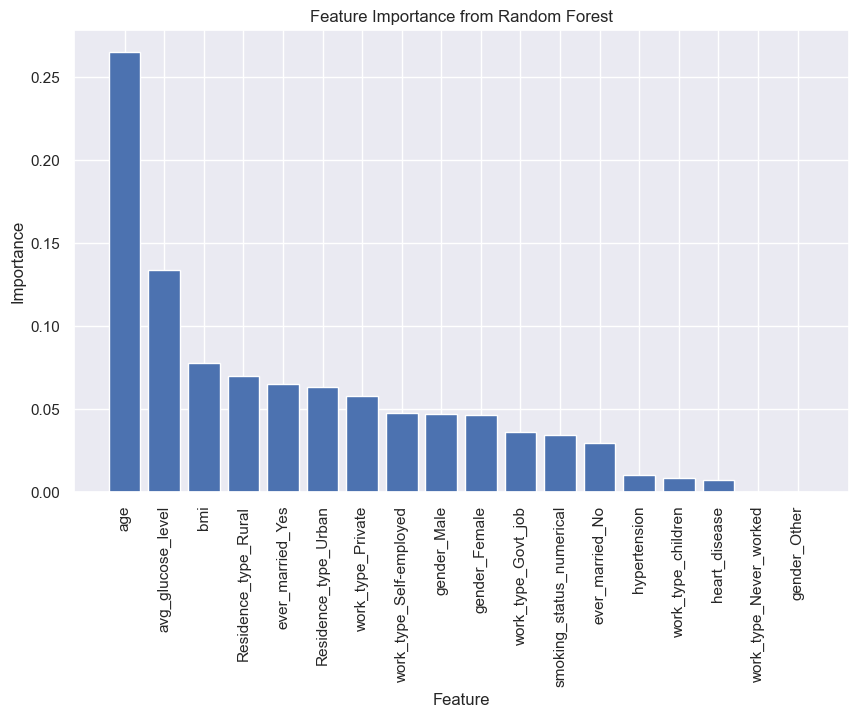

In [51]:
# Extract feature importances
feature_importance = random_forest.feature_importances_

# Sort feature importances in descending order
sorted_indices = feature_importance.argsort()[::-1]
sorted_feature_importance = feature_importance[sorted_indices]

# Extract feature names
feature_names = cleancsvM_encoded_resampled.columns[sorted_indices]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance, tick_label=feature_names)
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

Upon examining the feature importance graph derived from the Random Forest model, it is clear that age has the most significance in predicting stroke risk. This finding is consistent with prior medical research, which has long established age as a key risk factor for stroke. Following age, variables such as average glucose level and BMI emerge as important predictors of stroke.

Interestingly, gender also carries significance in predicting stroke risk, with the graph indicating that females may have a slightly higher chance of experiencing a stroke compared to males. This observation underscores the importance of considering gender-specific risk factors and preventive measures in stroke management.

Moreover, marital status, particularly being ever married, emerges as an important predictor of stroke, with a significance level comparable to that of BMI. We hypothesize that individuals who report their marital status are typically older in age compared to those who have never been married before. This aligns with common demographic trends, as marital status is often associated with age. Therefore, we indirectly captured the influence of age-related factors.

Lastly, our analysis reveals some unexpected findings regarding other health-related factors. Contrary to common assumptions, variables such as hypertension and heart disease appear to have limited correlation with stroke risk according to the feature importance analysis. 

# Overall Summary

In summary, we managed to build a model that has a confidence of ~97.7% in predicting whether an individual would get a Stroke or No Stroke based on a comprehensive set of features including age, gender, and various health-related factors such as hypertension, heart disease, marital status, occupation, average glucose level, BMI, and smoking status. From this mini project, our main takeaways are:

1. The best model prediction sometimes isn't just based on a single model/algorithm itself, but a combination of models, each exceling in different areas to get the best model out of the dataset.
2. Feature engineering allows us to do more with the data, by exploring ways to represent the data, beyond what is provided to us
3. Handling class imbalance is an important factor when the dataset leans towards an imbalance classification as it can severely impact how the model is build and its predictions.

This project has given us the opportunity to explore and learn new ways to represent a given dataset, and the applications and models that can be applied to it.